Features affecting calorie burn:
 Calories       1.000000
Duration       0.955421
Heart_Rate     0.897882
Body_Temp      0.824558
Age            0.154395
Weight         0.035481
Gender_male    0.022357
Height         0.017537
User_ID       -0.001661
Name: Calories, dtype: float64


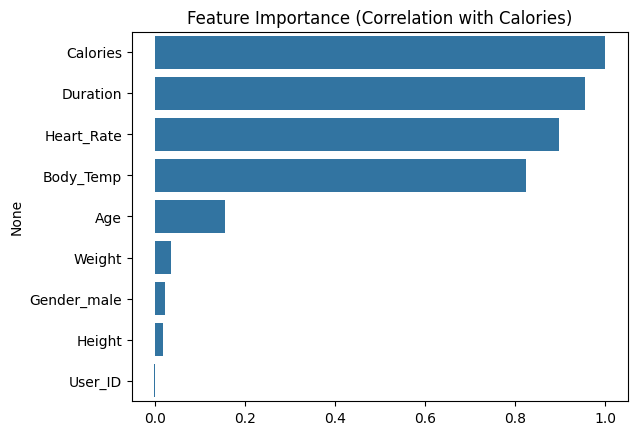

In [21]:
# 1. Which features affect calorie burn?

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv("calories (1).csv")

# Convert 'Gender' to numerical using one-hot encoding
data = pd.get_dummies(data, columns=['Gender'], drop_first=True)


# Correlation with target
correlation = data.corr()["Calories"].sort_values(ascending=False)
print("Features affecting calorie burn:\n", correlation)

# Visualization
sns.barplot(x=correlation.values, y=correlation.index)
plt.title("Feature Importance (Correlation with Calories)")
plt.show()

In [6]:
# 2. How accurate is the model?

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X = data.drop("Calories", axis=1)
y = data["Calories"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))


R² Score: 0.9672759152492365


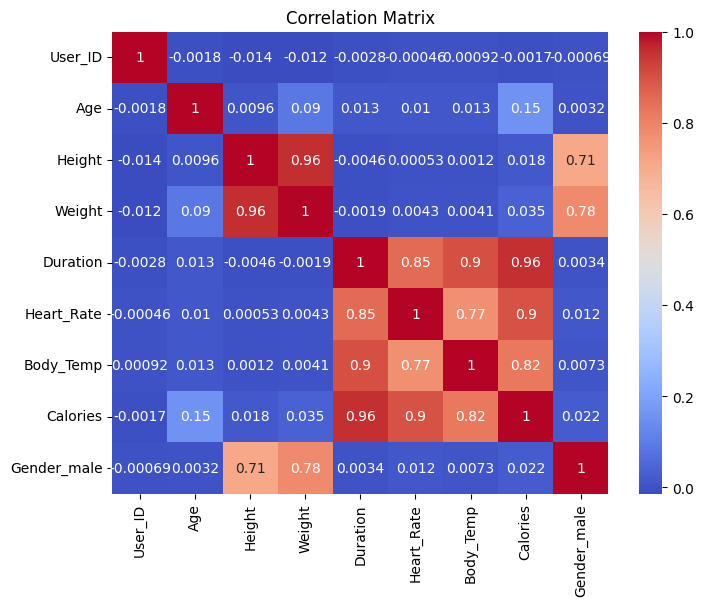

In [7]:
# 3. What is the correlation matrix?

plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [8]:
# 4. How to handle missing values?

# Check missing values
print(data.isnull().sum())

# Option 1: Fill missing with mean
data.fillna(data.mean(), inplace=True)

# Option 2: Drop missing rows
# data.dropna(inplace=True)


User_ID        0
Age            0
Height         0
Weight         0
Duration       0
Heart_Rate     0
Body_Temp      0
Calories       0
Gender_male    0
dtype: int64


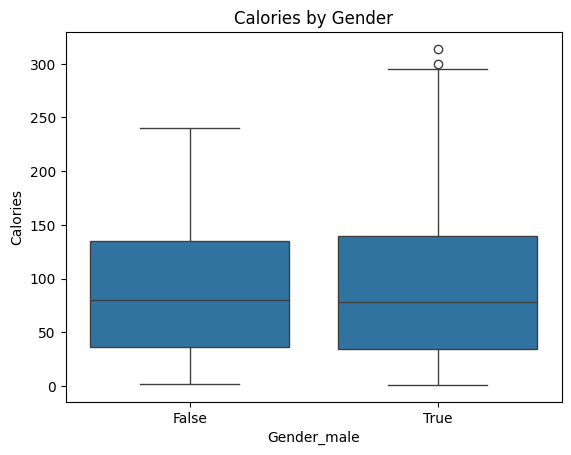

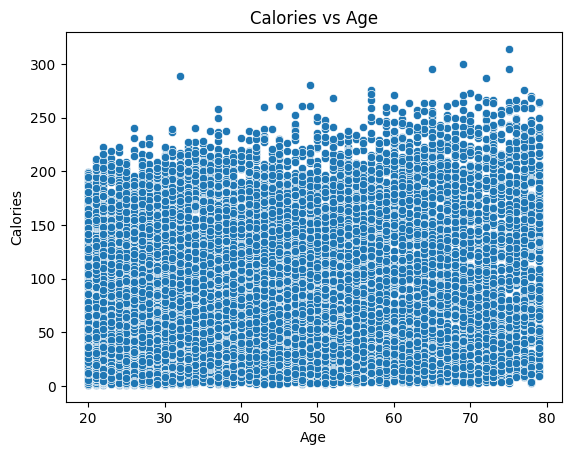

In [10]:
# 5. What is the impact of age/gender?

sns.boxplot(x="Gender_male", y="Calories", data=data)
plt.title("Calories by Gender")
plt.show()

sns.scatterplot(x="Age", y="Calories", data=data)
plt.title("Calories vs Age")
plt.show()

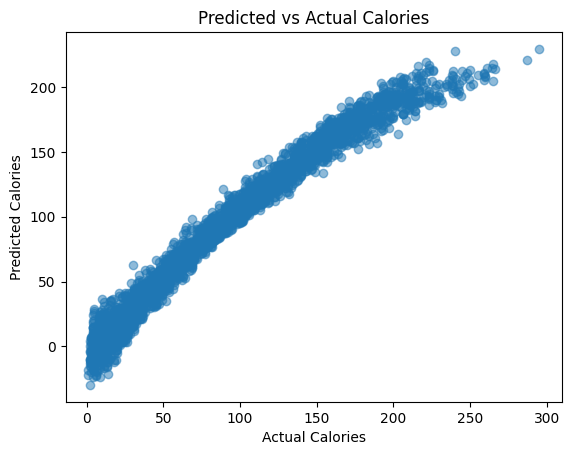

In [11]:
# 6. How to visualize predictions?

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.title("Predicted vs Actual Calories")
plt.show()


In [12]:
#7. What is the role of normalization?

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Before normalization (sample):\n", X.iloc[0])
print("After normalization (sample):\n", X_scaled[0])


Before normalization (sample):
 User_ID        14733363
Age                  68
Height            190.0
Weight             94.0
Duration           29.0
Heart_Rate        105.0
Body_Temp          40.8
Gender_male        True
Name: 0, dtype: object
After normalization (sample):
 [-0.08493432  1.48472604  1.08958204  1.26590864  1.61912727  0.98940395
  0.99402302  1.00709181]


In [13]:
# 8. How to evaluate RMSE?

from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 11.492066060576976


In [14]:
# 9. Can we use polynomial regression?

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)

model_poly = LinearRegression()
model_poly.fit(X_poly, y_train)

y_poly_pred = model_poly.predict(poly.transform(X_test))
print("Polynomial R²:", r2_score(y_test, y_poly_pred))


Polynomial R²: 0.9735801740582007


In [15]:
# 10. How to deploy the model?

import joblib

# Save model
joblib.dump(model, "calories_model.pkl")

# Load model
loaded_model = joblib.load("calories_model.pkl")

# Test
print("Prediction:", loaded_model.predict([X_test.iloc[0]]))


Prediction: [np.float64(170.53560015483606)]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [16]:
# 11. How to split dataset?

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (12000, 8)
Testing set size: (3000, 8)


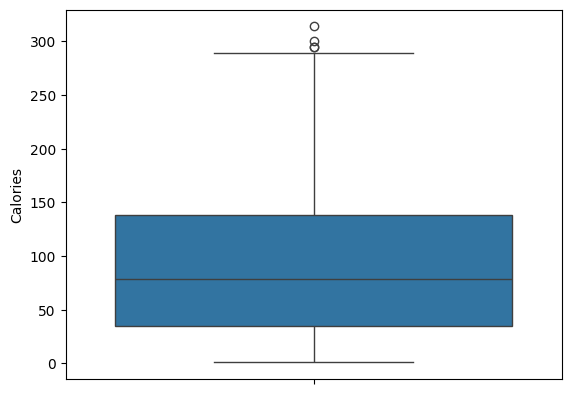

In [17]:
# 12. How to detect and remove outliers?

sns.boxplot(data["Calories"])
plt.show()

# Remove outliers using IQR
Q1 = data["Calories"].quantile(0.25)
Q3 = data["Calories"].quantile(0.75)
IQR = Q3 - Q1
data = data[~((data["Calories"] < (Q1 - 1.5*IQR)) | (data["Calories"] > (Q3 + 1.5*IQR)))]


In [18]:
# 13. Can feature selection improve accuracy?

from sklearn.feature_selection import SelectKBest, f_regression

best_features = SelectKBest(score_func=f_regression, k=5)
fit = best_features.fit(X, y)
df_scores = pd.DataFrame(fit.scores_, index=X.columns, columns=["Score"])
print(df_scores.sort_values(by="Score", ascending=False))


                     Score
Duration     157053.439628
Heart_Rate    62387.944213
Body_Temp     31855.448809
Age             366.250807
Weight           18.904356
Gender_male       7.500390
Height            4.613877
User_ID           0.041399


In [19]:
# 14. How does cross-validation affect performance?

from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("Cross-validation scores:", scores)
print("Mean CV Score:", scores.mean())


Cross-validation scores: [0.96713558 0.96658781 0.96769934 0.96823749 0.96607618]
Mean CV Score: 0.9671472789183078


In [20]:
# 15. How to save and load trained model?

# Already shown in Q10
# Alternative using pickle
import pickle

with open("linear_model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("linear_model.pkl", "rb") as f:
    model_loaded = pickle.load(f)

print("Test Prediction:", model_loaded.predict([X_test.iloc[0]]))


Test Prediction: [np.float64(170.53560015483606)]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
